In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df=pd.read_csv("/content/NFLX.csv")

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


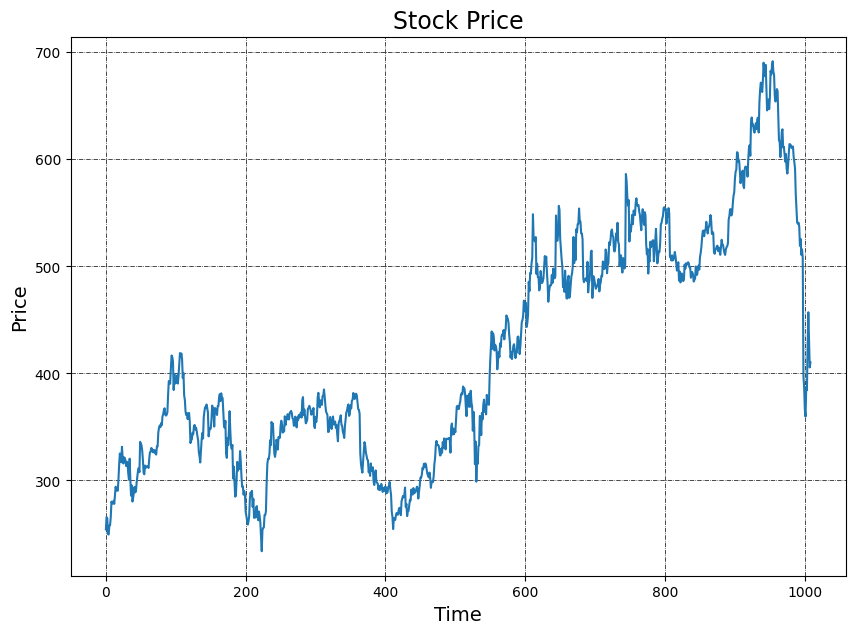

In [ ]:
df['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [ ]:
target = "Close"
y = df[target]
X = df.drop(columns= target)
#Split the data into train and test sets
cutoff = int(len(X) * 0.8)
X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred_baseline = [y_train.mean()] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean Close Prices:", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean Close Prices: 384.29
Baseline MAE: 72.51


In [ ]:
df = df.drop(columns=['Date'])

KeyError: "['Date'] not found in axis"

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
LinearRegression()

LinearRegression()

In [ ]:
training_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, model.predict(X_test))
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training MAE: 0.0
Test MAE: 0.0


In [ ]:
intercept = model.intercept_.round(2)
coefficient = model.coef_.round(2)[0]
print(f"Close Price = {intercept} + ({coefficient} * Close.L1)")


Close Price = -0.0 + (-0.0 * Close.L1)


In [ ]:
df_pred_test = pd.DataFrame(
             {
             "y_test": y_test,
             "y_pred": model.predict(X_test)
             }
)
df_pred_test.head()

,y_test,y_pred
807,508.899994,508.899994
808,508.779999,508.779999
809,505.549988,505.549988
810,510.299988,510.299988
811,505.549988,505.549988


In [ ]:
import plotly.express as px
fig = px.line(df_pred_test, labels= {"value": "Close Price"}, title = "Linear Regression Model: Actual Prices vs. Predicted Prices.")
fig.show()